## HUNTING EXOPLANETS IN SPACE 🛰️

### Conceptual Background: Detection of Exoplanets using Kepler Telescope Data

1. **About the project**:
   - The aim of this project is to deploy a machine learning model that detects exoplanets in space using the data obtained by Kepler Telescope.
   - Kepler Telescope is used to measure the brightness of stars in distant galaxies to detect exoplanets by observing variations in star's brightness.
   - **Transit Method**: When an exoplanet transits in front of its star (from our perspective), the brightness recorded by Kepler decreases. Conversely, when the exoplanet moves behind the star, the brightness level increases.
   - This method identifies exoplanets by detecting periodic dips in the star's brightness, forming a wave-like pattern on a brightness-time graph.

2. **Flow of model deployment**:
   - Analysing the Data
   - Data Visualisation using matplotlib
   - Data Normalisation- Mean Normalisation, Fast Fourier Tranformation, Oversampling using SMOTE
   - Model Deployment- Random Forest Classifier and XGBoost
   - Model Evaluation- Confusion Matrix and Classification Report

 <img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/transit-method-gif.gif' width='600'>

*Image credits: https://imgur.com/r/SpaceGifs/43f17Ke*

### LOADING THE DATASETS (TRAINING AND TESTING)- FROM CLOUD STORAGE

In [193]:
import pandas as pd

exo_traindf = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_traindf.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [194]:
exo_testdf = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')
exo_testdf.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [195]:
print(exo_traindf.shape)
print(exo_testdf.shape)

(5087, 3198)
(570, 3198)


### CHECKING FOR MISSING VALUES

In [197]:
exo_traindf.isnull()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5085,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
exo_traindf.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

It is not feasible to manually see the count of missing values of all the columns in such a large dataset. So now we need to iterate through all the columns individually to obtain a conclusion related to missing values.

In [200]:
# obtaining a list of columns in the dataset
exo_traindf.columns

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)

In [201]:
# fetching values of a column
exo_traindf['LABEL']

0       2
1       2
2       2
3       2
4       2
       ..
5082    1
5083    1
5084    1
5085    1
5086    1
Name: LABEL, Length: 5087, dtype: int64

In [202]:
# counting the missing values
num_missing_values = 0

for i in exo_traindf.columns:
    for j in exo_traindf[i].isnull():
        if j==True:
            num_missing_values += 1

print("Total missing values in the training dataset =", num_missing_values)

Total missing values in the training dataset = 0


### DATA VISUALISATION 
We will plot scatter plots for some stars to verify their periodic dips.

In [204]:
# creating pandas series for first and last two stars of the dataset
star0 = exo_traindf.iloc[0, :]
star1 = exo_traindf.iloc[1, :]
star5085 = exo_traindf.iloc[5085, :]
star5086 = exo_traindf.iloc[5086, :]

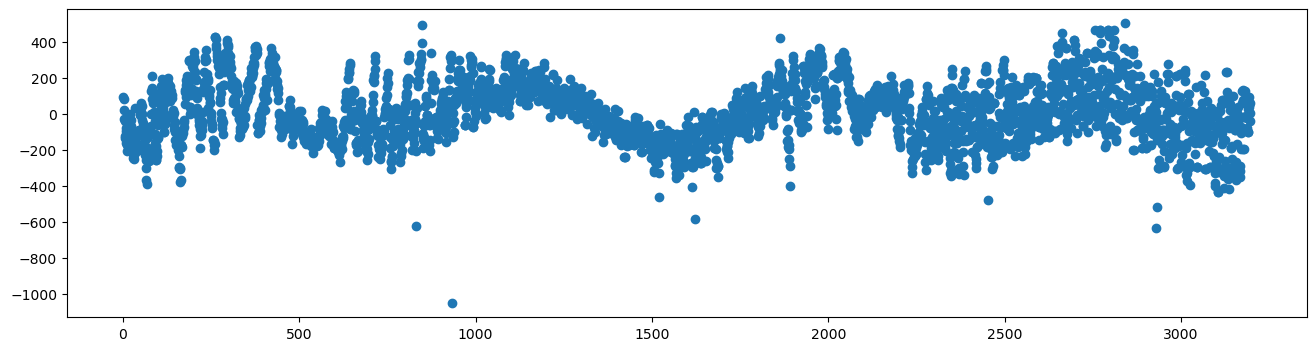

In [205]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,4))
x_values_star0 = np.arange(1,3198)
y_values_star0 = star0[1:] # we ignore LABEL column as it's not a flux value

plt.scatter(x_values_star0, y_values_star0)
plt.show()

In the first star, there is a downward peak in the brightness level recorded by Kepler Telescope. This suggests that it has at least one planet.

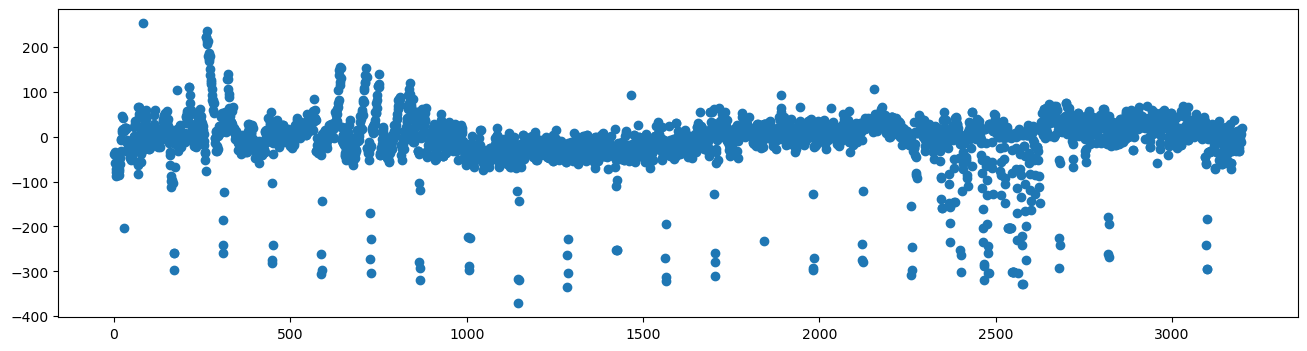

In [207]:
plt.figure(figsize=(16,4))
x_values_star1 = np.arange(1,3198)
y_values_star1 = star1[1:]

plt.scatter(x_values_star1, y_values_star1)
plt.show()

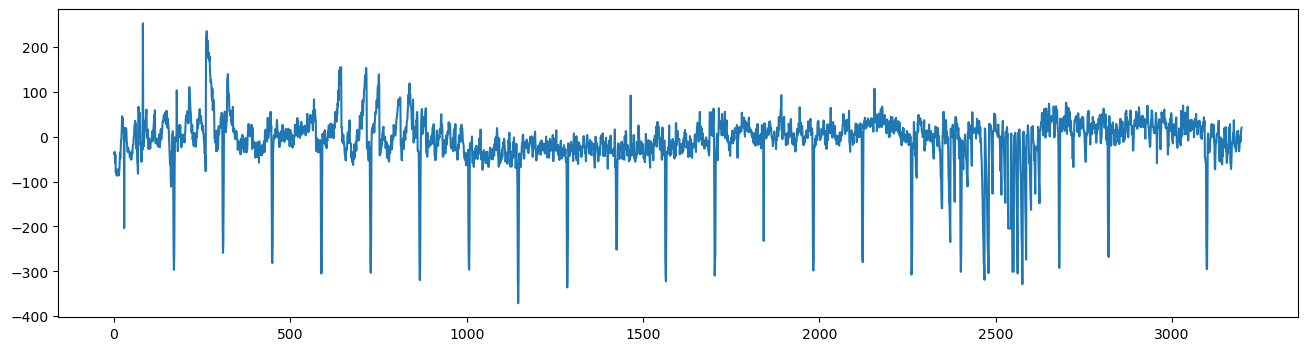

In [208]:
plt.figure(figsize=(16,4))
plt.plot(x_values_star1, y_values_star1)
plt.show()

As we can see, there are consistent sudden drops in the brightness levels for the second star (which were not exactly clear with the scatter plot). This suggests that the planet is orbiting its star at very high radial speed or the planet could be very close to the star.

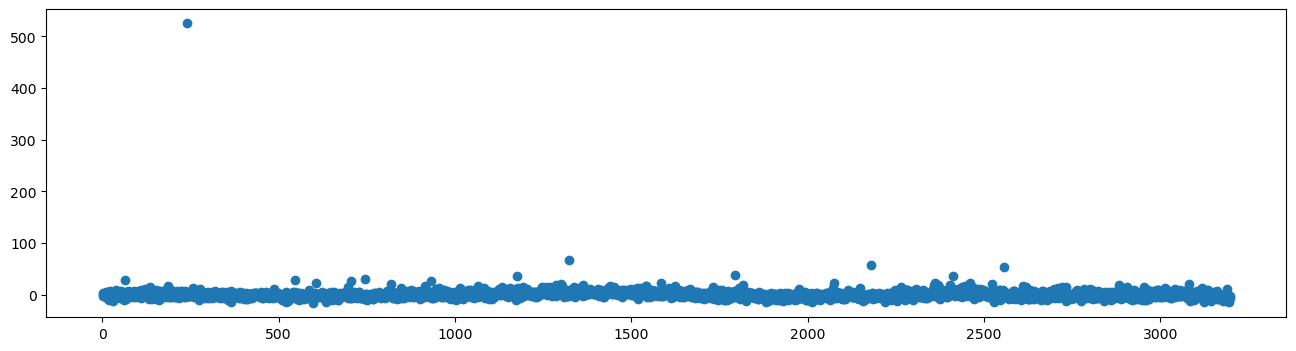

In [210]:
plt.figure(figsize=(16,4))
x_values_star5085 = np.arange(1,3198)
y_values_star5085 = star5085[1:]

plt.scatter(x_values_star5085, y_values_star5085)
plt.show()

There is no clear downward peak for this star and we can conclude that it has no exoplanet.

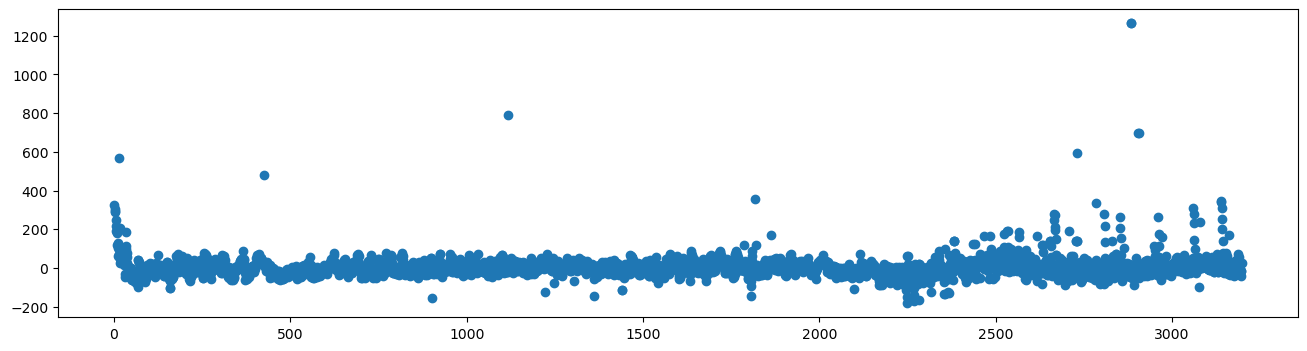

In [212]:
plt.figure(figsize=(16,4))
x_values_star5086 = np.arange(1,3198)
y_values_star5086 = star5086[1:]

plt.scatter(x_values_star5086, y_values_star5086)
plt.show()

There are some sudden spikes in the line plot but they exist at irregular intervals. So we cannot say for sure that the star has a planet.

### DEPLOYING A PREDICTION MODEL- RANDOM FOREST CLASSIFIER

In [215]:
exo_testdf['LABEL'].value_counts()

LABEL
1    565
2      5
Name: count, dtype: int64

In [216]:
from sklearn.ensemble import RandomForestClassifier

# separating the feature variables (flux values) and target variable (Label)
feat_traindf = exo_traindf.iloc[:, 1:]
target_traindf = exo_traindf.iloc[:, 0]

# fitting the model with feature and target variables
model = RandomForestClassifier(n_jobs=-1, n_estimators=50)
model.fit(feat_traindf, target_traindf)
model.score(feat_traindf, target_traindf)

1.0

In [217]:
feat_testdf = exo_testdf.iloc[:, 1:]
target_testdf = exo_testdf.iloc[:, 0]

# calling the predict() function to make predictions on the test dataset
predicted = model.predict(feat_testdf)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [218]:
predicted_series = pd.Series(predicted)
predicted_series.value_counts()

1    570
Name: count, dtype: int64

It can be inferred that the model should have classified 5 stars with label 2 and rest 565 stars with label 1. But, it classifies all the stars with label 1 and due to smaller number of stars with label 2, accuracy of the model is still maintained. This model cannot be deployed or put to use because our ultimate goal was to find exoplanets in space which is not fulfilled.

### MODEL EVALUATION- CONFUSION MATRIX & CLASSIFICATION REPORT

There can be 4 possibilities-
1. Class 1 values predicted as Class 1
2. Class 1 values predicted as Class 2
3. Class 2 values predicted as Class 1
4. Class 2 values predicted as Class 2

In [222]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(target_testdf, predicted)

array([[565,   0],
       [  5,   0]], dtype=int64)

In [224]:
print(classification_report(target_testdf, predicted))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\samri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We need to improvise on this because despite having good accuracy, the model is not a good fit and has low f1 score denoting poor precision and recall values. The model didn't pass all the parameters of model evaluation due to which we will perform Data Normalisation now.

### DATA NORMALISATION

#### MEAN NORMALISATION

In [228]:
exo_traindf.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


We can see that the flux values differ a lot in scale and hence we need to bring every single data point on a uniform scale to avoid the possibility of model focussing on the larger values while learning the properties of data.
I will be using the **mean normalisation method**

$$x_{norm} = \frac{x_p - x_{mean}}{x_{max} - x_{min}}$$


In [231]:
def mean_normalise(series):
    # vectorised operation
    norm = (series-series.mean()) / (series.max()-series.min())
    return norm

In [232]:
# creating a dataframe with normalised flux values, leaving the LABEL column 
# we apply the function mean_normalise(), horizontally keeping the axis=1
norm_traindf = exo_traindf.iloc[:, 1:].apply(mean_normalise, axis=1)
# inserting the LABEL column in the norm_traindf 
norm_traindf.insert(loc=0, column='LABEL', value= exo_traindf['LABEL'])
norm_traindf.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [233]:
norm_testdf = exo_testdf.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_testdf.insert(loc=0, column='LABEL', value=exo_testdf['LABEL'])
norm_testdf.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


#### FAST FOURIER TRANSFORMATION (FFT)

This will convert our time-dependent data into frequency-dependent data. Our model can better capture these frequencies while learning from the training data, allowing itself to make more accuate predictions. We will apply FFT on all our stars and create line plots for the same.

In [236]:
# taking the transpose of the dataframe
exo_traindf.T

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,...,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,...,3.80,-10.69,86.29,-20.12,-46.29,-24.45,38.03,65.73,-4.65,-41.31
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65,-41.63,-11.77,-10.62,26.94,3648.34,...,16.33,-9.54,13.06,-14.41,-3.08,-17.00,100.28,88.42,-14.55,-16.72
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79,-52.90,-9.25,-112.02,34.08,3671.97,...,27.35,-2.48,161.22,-43.35,-28.43,3.23,-45.64,79.07,-6.41,-14.09


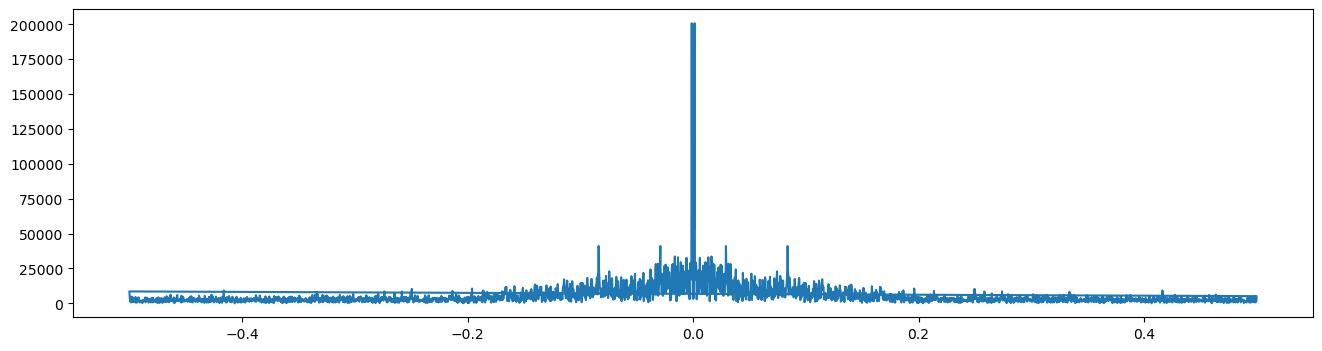

In [237]:
# we applied abs() function because the transformed values sometimes turn out to be complex numbers
fft_star0 = np.abs(np.fft.fft(star0))

# frequency array will be same for all the stars because it depends on the length of series (all stars have same array length)
frequency = np.fft.fftfreq(len(star0))

plt.figure(figsize=(16,4))
x_value = frequency
y_value = fft_star0
plt.plot(x_value, y_value)
plt.show()


In [238]:
def fft_func(series):
    fft_star = np.fft.fft(series, n=len(series))
    return np.abs(fft_star)

In [239]:
traindf_T = norm_traindf.iloc[:, 1:].T
fft_traindf_T = traindf_T.apply(fft_func, axis = 0)
# After transforming the 'FLUX' values, we again take the transpose.
fft_train = fft_traindf_T.T
fft_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.004706e-15,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.094300e-15,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,3.742374e-15,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,8.024386e-15,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,4.881195e-15,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655


In [240]:
# applying fft on test dataset
testdf_T = norm_testdf.iloc[:, 1:].T
fft_testdf_T = testdf_T.apply(fft_func, axis = 0)
# After transforming the 'FLUX' values, we again take the transpose.
fft_test = fft_testdf_T.T
fft_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.004706e-15,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.094300e-15,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,3.742374e-15,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,8.024386e-15,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,4.881195e-15,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655


#### OVERSAMPLING- SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE (SMOTE)

In our classification algorithm, the dataset is imabalanced with very few stars having label 2 as compared to ones having label 1. Imbalanced data is posing a problem that prediction model is getting biased in favour of the majority class in making predictions.

In [243]:
from imblearn.over_sampling import SMOTE

train = norm_traindf['LABEL']
test = norm_testdf['LABEL']

# sampling_strategy=1 implies that number of samples having label 1 and 2 should be equal
smote = SMOTE(sampling_strategy=1)
x_fft_train, y_fft_train = smote.fit_resample(fft_train,train)

print(x_fft_train.shape)
print(y_fft_train.shape)

(10100, 3197)
(10100,)


### REDEPLOYING THE MODEL

In [245]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=50)
model.fit(x_fft_train, y_fft_train)

predicted = model.predict(fft_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

So, even after processing the data with normalisation, Fast Fourier Transformation and oversampling, the Random Forest Classifier prediction model has failed to detect the stars having a planet. 

### XGBoost CLASSIFIER MODEL

In [249]:
import xgboost as xg
model = xg.XGBClassifier()

# replacing label values 1 with 0 and 2 with 1- to avoid error of invalid classes
y_fft_train = y_fft_train.replace({1: 0, 2: 1}) 
model.fit(x_fft_train, y_fft_train)

model_predict = model.predict(np.array(fft_test))
print(model_predict)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [251]:
confusion_matrix(test,model_predict)

array([[  0,   0,   0],
       [565,   0,   0],
       [  3,   2,   0]], dtype=int64)

XG Boost Classifier successfully predicted 2 stars out of 5, that have an exoplanet. 